In [1]:

from convertions import mp3_to_signal, signal_to_spectro, spectro_to_image
from convertions import image_to_spectro, spectro_to_signal, signal_to_mp3
from convertions import signal_batch_maker, signal_batch_joiner
from plots import plot_audio_signal, plot_spectrogram

import os
import numpy as np


In [2]:
spectro_folder = "data/spectro/"
mp3_folder = "data/audio/"

audio_file_path = mp3_folder + "a-night-in-tunisia.mp3"
batch_duration = 60 # seconds

## Convert audio file to spectrogram and save it to spectro_file_path

mp3_to_signal()
  - Checking input parameters...
  - Loading audio file...
## end mp3_to_signal()


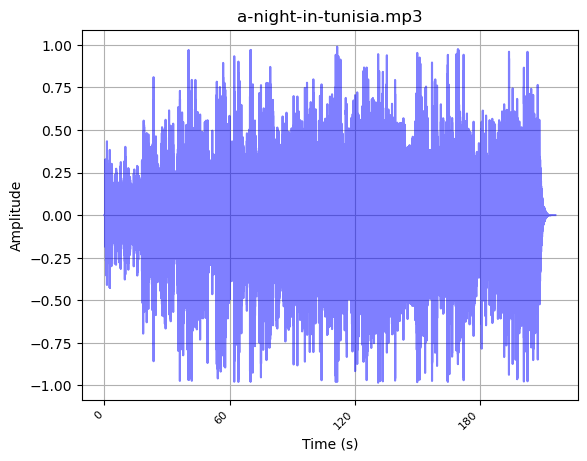

In [3]:
# Load audio file
audio_signal, sr = mp3_to_signal(audio_file_path, display=True)

plot_audio_signal(audio_signal, sr, title=audio_file_path.split("/")[-1])

In [4]:
# Split audio signal into batches of duration
batch_size = int(sr * batch_duration)
audio_signal_batches = signal_batch_maker(audio_signal, batch_size, display=True)

signal_batch_maker()
  - Checking input parameters...
  - Splitting audio signal into batches...
## end signal_batch_maker()


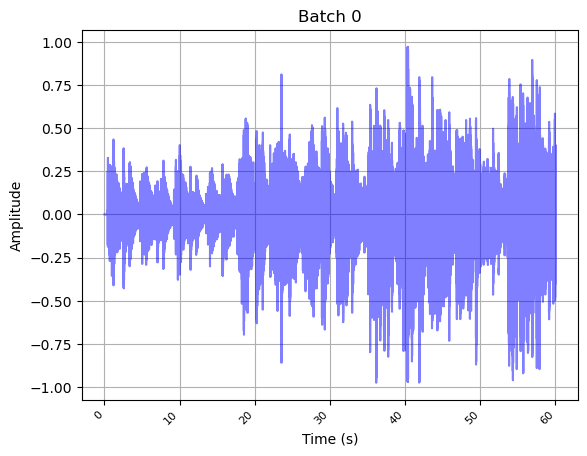

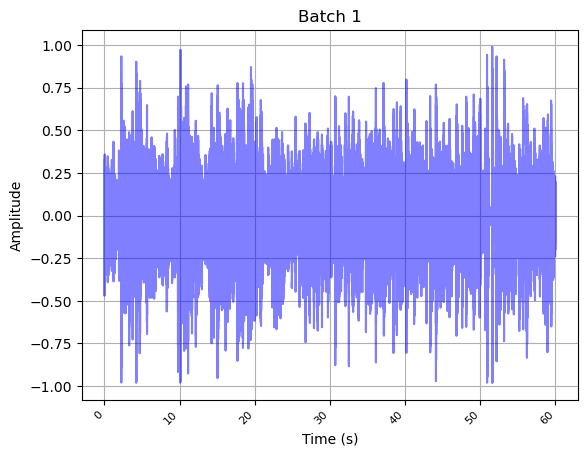

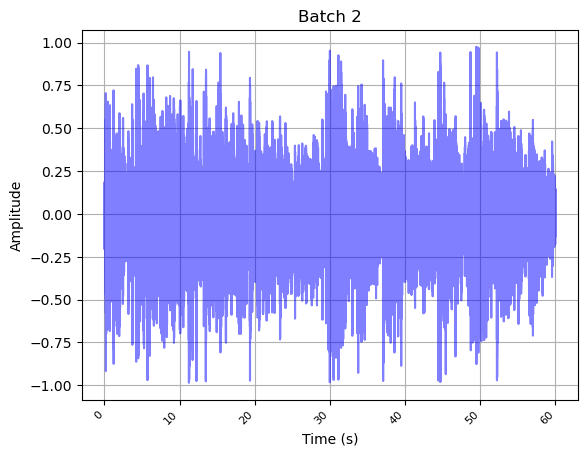

In [5]:
for i, audio_signal_batch in enumerate(audio_signal_batches):
    plot_audio_signal(audio_signal_batch, sr, title="Batch {}".format(i))

In [6]:
# create folder for spectrograms
spectro_dir_path = spectro_folder + audio_file_path.split("/")[-1].split(".")[0] + "/"
if not os.path.exists(spectro_dir_path):
    os.makedirs(spectro_dir_path)

In [7]:
# get the n_fft and hop_length parameters
# we want the spectrogram to be square, dim = (image_size, image_size)
# We can know in advance the size of the spectrogram with n_fft and hop_length
# the spectrogram size is ( n_fft/2 + 1, audio_signal.shape[0] / hop_length + 1 )
n_fft = 2048
hop_length = n_fft // 4

print(" - Parameters:")
print("      Audio signal shape:", audio_signal.shape)
print("      Sampling rate     :", sr)
print("      Batch size        :", batch_size)
print("      n_fft             :", n_fft)
print("      hop_length        :", hop_length)

 - Parameters:
      Audio signal shape: (9535488,)
      Sampling rate     : 44100
      Batch size        : 2646000
      n_fft             : 2048
      hop_length        : 512


In [8]:
D_before = signal_to_spectro(audio_signal_batches[0], n_fft=n_fft, hop_length=hop_length, display=True)

print(D_before.shape)

signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
(1025, 5168)


In [9]:
min_spectro_db = []
max_spectro_db = []

for i, audio_signal_batch in enumerate(audio_signal_batches):    
    # Convert audio to spectrogram
    D = signal_to_spectro(audio_signal_batch, n_fft, hop_length, display=True)
    
    # assert D.shape[0] == image_size and D.shape[1] == image_size, "Spectrogram shape must be (image_size, image_size) = ({}, {}) but is {}".format(image_size, image_size, D.shape)
    if display: print("  - Spectrogram shape:", D.shape)
    
    min_spectro_db.append(D.min())
    max_spectro_db.append(D.max())
    
    # Convert spectrogram to image
    spectro_file_path = spectro_dir_path + str(i) + ".png"
    
    spectro_to_image(D, spectro_file_path, display=True)

if display: print("## end mp3_to_image()")    

signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
  - Spectrogram shape: (1025, 5168)
spectro_to_image()
  - Rescaling spectrogram (0 - 255)...
  - Cropping spectrogram...
  - Saving spectrogram...
## end spectro_to_image()
signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
  - Spectrogram shape: (1025, 5168)
spectro_to_image()
  - Rescaling spectrogram (0 - 255)...
  - Cropping spectrogram...
  - Saving spectrogram...
## end spectro_to_image()
signal_to_spectro()
  - Checking input parameters...
  - Converting audio to spectrogram...
  - Converting spectrogram to decibels...
## end signal_to_spectro()
  - Spectrogram shape: (1025, 5168)
spectro_to_image()
  - Rescaling spectrogram (0 - 255)...
  - Cropping spectrogram...
  - Saving spectrogram...
## end spectro_to_ima

## Convert spectrogram to audio file and save it to audio_file_path

In [10]:
spectro_file_path = spectro_dir_path + "0.png"

spectro_size = (batch_duration * sr)

D = image_to_spectro(spectro_file_path, min_spectro_db=min_spectro_db[0], max_spectro_db=max_spectro_db[0], display=True)

# compare D_before and D
print("D_before")
print("  Shape", D_before.shape)
print("  Type", type(D_before))
print("  dtype", D_before.dtype)
print("  min", np.min(D_before))
print("  max", np.max(D_before))
print("  mean", np.mean(D_before))
print("  std", np.std(D_before))

print("D")
print("  Shape", D.shape)
print("  Type", type(D))
print("  dtype", D.dtype)
print("  min", np.min(D))
print("  max", np.max(D))
print("  mean", np.mean(D))
print("  std", np.std(D))


mse = np.mean((D_before - D)**2)
print("mse", mse)

image_to_spectro()
  - Checking input parameters...
  - Loading spectrogram image...
  - Spectrogram image shape: (5168, 1025)
  - Converting spectrogram image to numpy array...
    - Spectrogram shape: (1025, 5168)
## end image_to_spectro()
D_before
  Shape (1025, 5168)
  Type <class 'numpy.ndarray'>
  dtype float32
  min -30.480274
  max 49.519726
  mean -24.221203
  std 11.472555
D
  Shape (1025, 5168)
  Type <class 'numpy.ndarray'>
  dtype float32
  min -30.480274
  max 49.519726
  mean -24.27821
  std 11.41829
mse 0.01191754


spectro_to_signal()
  - Checking input parameters...
  - Converting spectrogram to audio...
  - Rescaling audio signal (-1, 1)...
## end spectro_to_signal()
(2645504,)
float32
1.0294663
-1.045756
-0.091694355
(2645504,)
float32


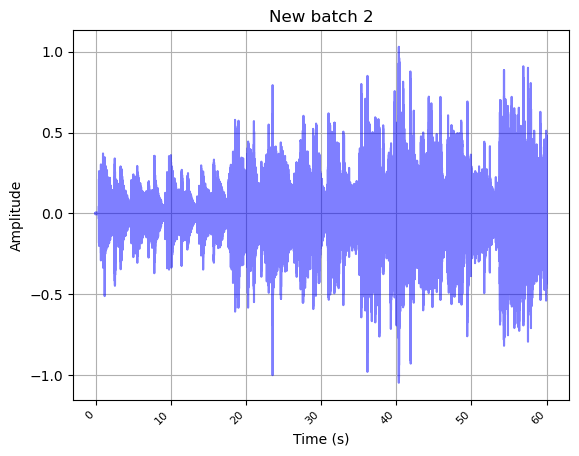

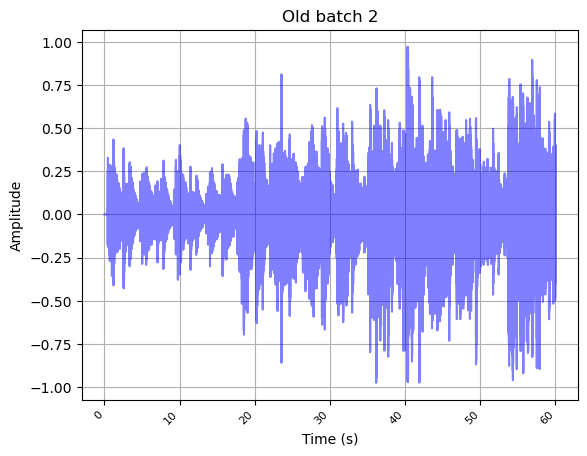

In [11]:
audio_signal_batch = spectro_to_signal(D, n_fft, hop_length, display=True)

# save the audio signal batch
signal_to_mp3(audio_signal_batch, sr, "data/audio_output/batch.mp3")

plot_audio_signal(audio_signal_batch, sr, title="New batch {}".format(i))
plot_audio_signal(audio_signal_batches[0], sr, title="Old batch {}".format(i))

In [12]:
# count the number of 0 values in the new audio signal
print("Number of 0 values in the new audio signal:", np.sum(audio_signal_batch == 0))
print("Number of non 0 values in the new audio signal:", np.sum(audio_signal_batch != 0))

print("ratio", np.sum(audio_signal_batch == 0) / np.sum(audio_signal_batch != 0))


# for old signal

# count the number of 0 values in the new audio signal
print("Number of 0 values in the old audio signal:", np.sum(audio_signal_batches[0] == 0))
print("Number of non 0 values in the old audio signal:", np.sum(audio_signal_batches[0] != 0))

print("ratio", np.sum(audio_signal_batches[0] == 0) / np.sum(audio_signal_batches[0] != 0))

Number of 0 values in the new audio signal: 0
Number of non 0 values in the new audio signal: 2645504
ratio 0.0
Number of 0 values in the old audio signal: 18289
Number of non 0 values in the old audio signal: 2627711
ratio 0.006960050020721456
